# GoogLeNet

Vediamo come utilizzare la rete Inception già disponibile in Keras e come istanziare questa rete in una sua versione la v3 per poi utilizzarla per fare delle predizione su delle immagini.

In [1]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import *
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.utils import plot_model

In [2]:
# modello già pronto in keras con un'architettura abbastanza profonda
model = InceptionV3(weights='imagenet') # imagenet contiene le labels del dataset su cui si è addestrato
model.summary()

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 299, 299, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 149, 149, 32)      │             864 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization           │ (None, 149, 149, 32)      │              96 │ conv2d[0][0]               │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation (Activation)       │ (None, 149, 149, 32)      │               0 │ batch_normalization[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_1 (Conv2D)             │ (None, 147, 147, 32)      │           9,216 │ activation[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_1         │ (None, 147, 147, 32)      │              96 │ conv2d_1[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_1 (Activation)     │ (None, 147, 147, 32)      │               0 │ batch_normalization_1[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_2 (Conv2D)             │ (None, 147, 147, 64)      │          18,432 │ activation_1[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_2         │ (None, 147, 147, 64)      │             192 │ conv2d_2[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_2 (Activation)     │ (None, 147, 147, 64)      │               0 │ batch_normalization_2[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 73, 73, 64)        │               0 │ activation_2[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_3 (Conv2D)             │ (None, 73, 73, 80)        │           5,120 │ max_pooling2d[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_3         │ (None, 73, 73, 80)        │             240 │ conv2d_3[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_3 (Activation)     │ (None, 73, 73, 80)        │               0 │ batch_normalization_3[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_4 (Conv2D)             │ (None, 71, 71, 192)       │         138,240 │ activation_3[0][0]         │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 23,851,784 (90.99 MB)

 Trainable params: 23,817,352 (90.86 MB)

 Non-trainable params: 34,432 (134.50 KB)

In [3]:
# per utilizzare plot_model di keras dobbiamo prima installare delle utility
# !pip install pydot
# !pip install pydotplus
# !pip install graphviz

In [5]:
# ora vediamo graficamente il modello InceptionV3
plot_model(model, "Week 3-4-5_CNN\Esercitazione GoogLeNet-InceptionBlock\google_inception_v3.png", show_shapes=True)

<>:2: SyntaxWarning: invalid escape sequence '\E'
<>:2: SyntaxWarning: invalid escape sequence '\E'
C:\Users\felip\AppData\Local\Temp\ipykernel_20476\498517413.py:2: SyntaxWarning: invalid escape sequence '\E'
  plot_model(model, "Week 3-4-5_CNN\Esercitazione GoogLeNet-InceptionBlock\google_inception_v3.png", show_shapes=True)


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.614028 to fit



<>:2: SyntaxWarning: invalid escape sequence '\E'
<>:2: SyntaxWarning: invalid escape sequence '\E'
C:\Users\felip\AppData\Local\Temp\ipykernel_20476\4282914805.py:2: SyntaxWarning: invalid escape sequence '\E'
  img = image.load_img("Week 3-4-5_CNN\Esercitazione GoogLeNet-InceptionBlock\dataset\office.jpg", target_size=(299, 299))


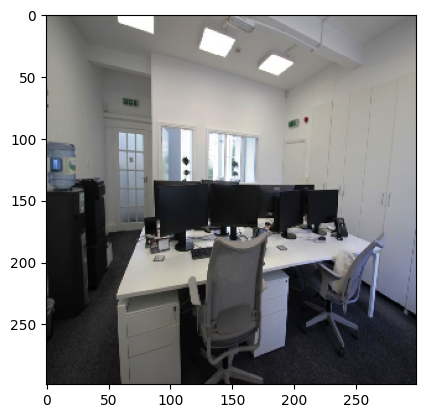

In [7]:
# andiamo ad utilizzare un'immagine impostando la sua dimensione
img = image.load_img("Week 3-4-5_CNN\Esercitazione GoogLeNet-InceptionBlock\dataset\office.jpg", target_size=(299, 299))

plt.imshow(img)
plt.show()

In [9]:
# converte l'immagine in un tensore
x = image.img_to_array(img)
x.shape

(299, 299, 3)

In [10]:
x = np.expand_dims(x, axis=0)
x.shape

(1, 299, 299, 3)

In [11]:
x = preprocess_input(x)
x.shape

(1, 299, 299, 3)

In [12]:
# ora che abbiamo reso l'immagine ingressabile al modello andiamo ad effettuare delle predizioni
# per ogni oggetto che viene rilevato dal modello andiamo a stampare le label che vengono riconosciute nell'immagine 
# secondo il nostro dataset imagenet
y = model.predict(x)
print(y)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
[[7.75885637e-05 2.91825545e-05 6.56315024e-05 5.49966499e-05
  8.14914383e-05 1.13282949e-04 4.26998631e-05 6.00663116e-05
  4.23380079e-05 3.34110227e-05 4.49197141e-05 4.41606353e-05
  4.10758475e-05 3.77420947e-05 8.31373181e-05 4.84037955e-05
  2.87513649e-05 4.62777825e-05 4.12873342e-05 6.24154272e-05
  6.60170626e-05 2.99549920e-05 2.26106094e-05 1.12604721e-05
  6.61419035e-05 6.11995129e-05 7.26593062e-05 2.43872601e-05
  5.23422787e-05 1.86481611e-05 9.89486725e-05 6.25030443e-05
  8.37101397e-05 5.80469023e-05 5.92568940e-05 1.17986747e-04
  1.87321217e-04 7.46165460e-05 4.70194645e-05 7.59630129e-05
  6.64652107e-05 6.08149348e-05 1.17334028e-04 9.03691471e-05
  7.01782992e-05 1.35020106e-04 7.16478025e-05 2.14837564e-04
  1.01103607e-04 6.64355539e-05 5.99033847e-05 1.18037737e-04
  3.48751855e-05 4.12989539e-05 7.48743769e-05 1.86731559e-04
  8.12260041e-05 6.93593029e-05 6.04356610e-05 1.02352363e-03
  9.35773496e-05 1.33984824e-04 6.

In [14]:
# dopo di che usiamo il metodo decode predictions di keras
# che prende in input le predizioni effettuate dal modello ed una valore top che indica di prendere le x labels con la confidence più alta
# in questo caso noi abbiamo delle label ed un certo grado di confidence
decoded_predictions = decode_predictions(y, top=5)
print(decoded_predictions)

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
[[('n03179701', 'desk', 0.6372458), ('n03337140', 'file', 0.116549194), ('n03201208', 'dining_table', 0.050730374), ('n03376595', 'folding_chair', 0.030444425), ('n03661043', 'library', 0.023351954)]]


come vediamo otteniamo un certo valore per la label 'desk' un'latro per la label 'file', un'latro per la label 'library' e così via abbiamo dei valori per tutte le labels del dataset imagenet. Estraiamo le 5 con il valore più alto cioè che il nostro modello ritiene siano presenti nell'immagine di input

In [15]:
# convertiamo i valori in percentuale

for index, res in enumerate(decoded_predictions[0]):
    print('{}. {}: {:.3f}%'.format(index+1, res[1], res[2]*100))

1. desk: 63.725%
2. file: 11.655%
3. dining_table: 5.073%
4. folding_chair: 3.044%
5. library: 2.335%


In [17]:
# ora facciamolo ma per i top 20
# vediamo che ci sono delle labels assolutamente appropriate
for index, res in enumerate(decode_predictions(y, top=20)[0]):
    print('{}. {}: {:.3f}%'.format(index+1, res[1], res[2]*100) )

1. desk: 63.725%
2. file: 11.655%
3. dining_table: 5.073%
4. folding_chair: 3.044%
5. library: 2.335%
6. photocopier: 1.055%
7. prison: 0.731%
8. stretcher: 0.505%
9. microwave: 0.421%
10. desktop_computer: 0.272%
11. shoji: 0.239%
12. iron: 0.202%
13. restaurant: 0.200%
14. bookcase: 0.177%
15. printer: 0.147%
16. lab_coat: 0.143%
17. wardrobe: 0.140%
18. refrigerator: 0.131%
19. safe: 0.131%
20. studio_couch: 0.125%
